# Basic Exploratory Data Analysis (EDA)

This notebook provides a comprehensive guide to basic exploratory data analysis techniques. EDA is a critical first step in any data analysis project, allowing you to understand the structure, patterns, and peculiarities of your dataset before applying more advanced analytical or machine learning techniques.

## What is EDA?

Exploratory Data Analysis is an approach to analyzing datasets to summarize their main characteristics, often using visual methods. The primary goal is to:
- Understand the data structure
- Detect outliers and anomalies
- Identify patterns and relationships
- Test underlying assumptions
- Develop an initial understanding before formal modeling

Let's explore the fundamental techniques of EDA!

## 1. Import Required Libraries

We'll start by importing the essential Python libraries needed for data analysis:

In [1]:
# Import essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configure visualization settings
# plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')  # valid in matplotlib 3.6+
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

# Display all columns and rows when printing DataFrames
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Suppress warning messages
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Check valid matplotlib styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 2. Load Dataset

For this demonstration, we'll load a sample dataset. We'll use the Titanic dataset from seaborn, which is a classic dataset for data analysis. We'll also show how to load data from different sources.

In [3]:
# Method 1: Load a dataset directly from seaborn
titanic_df = sns.load_dataset('titanic')

# Display the first few rows
print("Dataset from seaborn:")
titanic_df.head()

Dataset from seaborn:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Method 2: Load from scikit-learn (another common source)
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print("Iris dataset from scikit-learn:")
iris_df.head()

Iris dataset from scikit-learn:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# Method 3: Example of loading from CSV file (commented out since we don't have the file)
"""
# For loading from a local CSV file:
# data = pd.read_csv('path/to/your/file.csv')

# For loading from a URL:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data_from_url = pd.read_csv(url)
print("Dataset from URL:")
data_from_url.head()
"""

# For the rest of this notebook, we'll use the Titanic dataset
df = titanic_df.copy()
print(f"We'll use the Titanic dataset with {df.shape[0]} rows and {df.shape[1]} columns")

We'll use the Titanic dataset with 891 rows and 15 columns


## 3. Data Overview & Structure

Next, we'll explore the structure and composition of our dataset using various pandas methods to get a clear understanding of what we're working with.

In [6]:
# Let's examine the first few rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# Overview of the dataset information
print("Dataset information:")
df.info()

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
# Dataset dimensions
print(f"Dataset shape: {df.shape} (rows, columns)")

# Column names
print("\nColumn names:")
print(df.columns.tolist())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

Dataset shape: (891, 15) (rows, columns)

Column names:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Number of duplicate rows: 107


## 4. Descriptive Statistics

Now that we understand the structure of our data, let's calculate and examine summary statistics to get a better sense of the data's central tendency, dispersion, and distribution.

In [9]:
# Generate descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
df.describe()

Descriptive statistics for numerical columns:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# For categorical columns, we can use .describe(include=['object'])
print("Descriptive statistics for categorical columns:")
df.describe(include=['object'])

Descriptive statistics for categorical columns:


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [11]:
# We can also look at specific statistics for individual columns
print("Age statistics:")
print(f"Mean age: {df['age'].mean():.2f} years")
print(f"Median age: {df['age'].median():.2f} years")
print(f"Min age: {df['age'].min()} years")
print(f"Max age: {df['age'].max()} years")

# Mode for categorical variables
print("\nMost frequent passenger class:", df['class'].mode()[0])
print("Most frequent embarkation point:", df['embark_town'].mode()[0])

Age statistics:
Mean age: 29.70 years
Median age: 28.00 years
Min age: 0.42 years
Max age: 80.0 years

Most frequent passenger class: Third
Most frequent embarkation point: Southampton


## 5. Missing Value Analysis

Missing data can significantly impact the analysis and subsequent modeling. Let's identify, visualize, and address missing values in our dataset.

In [12]:
# Check for missing values in each column
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary DataFrame for missing values
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

# Sort by missing percentage in descending order
print("Missing data analysis:")
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

Missing data analysis:


,Missing Values,Percentage (%)
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467


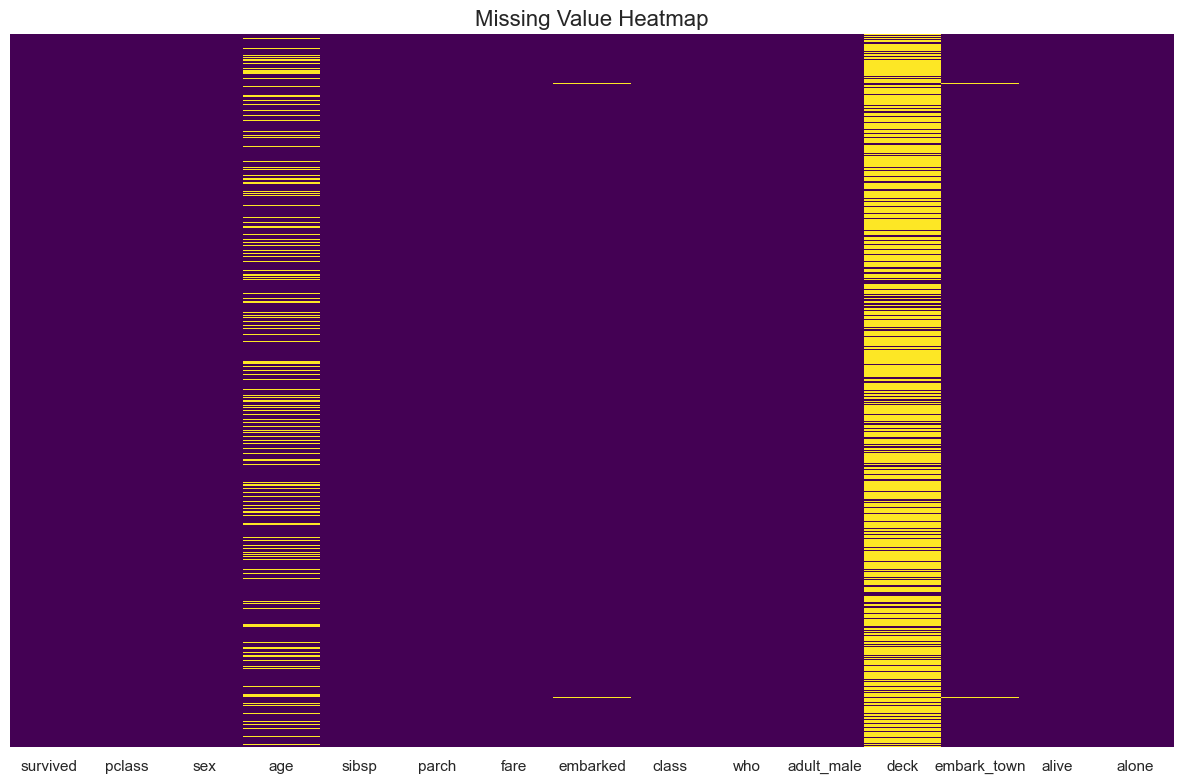

In [13]:
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

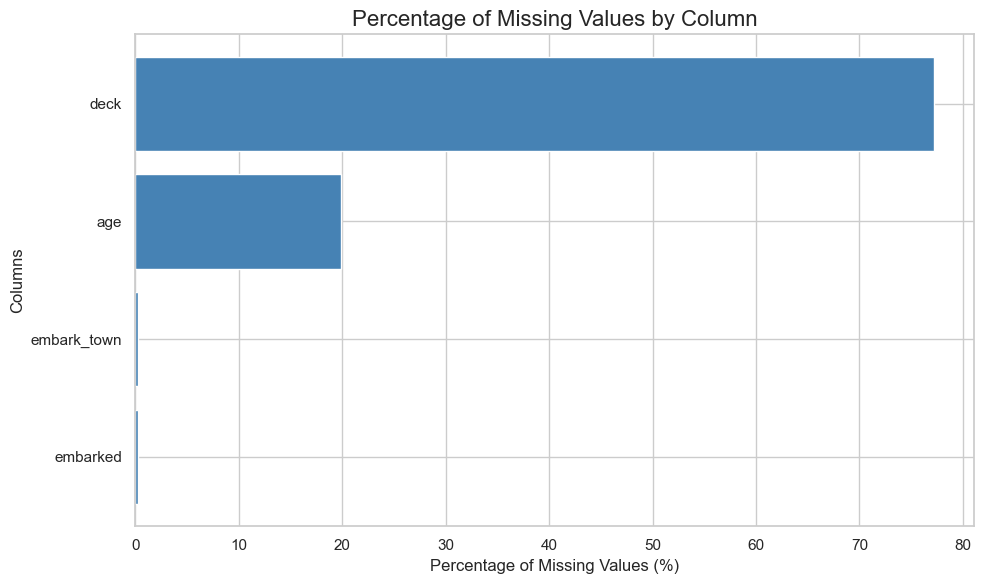

In [14]:
# Let's also visualize the percentage of missing values per column
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage (%)', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(missing_data.index, missing_data['Percentage (%)'], color='steelblue')
plt.xlabel('Percentage of Missing Values (%)')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.tight_layout()
plt.show()

### Handling Missing Values

There are several ways to handle missing values:
1. Remove rows with missing values
2. Fill with statistics (mean, median, mode)
3. Use advanced imputation techniques

Let's demonstrate a few of these methods:

In [15]:
# # Create a copy of the dataframe to avoid modifying the original
# df_clean = df.copy()

# # 1. Fill missing numerical values with median
# df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

# # 2. Fill missing categorical values with the mode (most frequent)
# df_clean['embark_town'] = df_clean['embark_town'].fillna(df_clean['embark_town'].mode()[0])
# df_clean['deck'] = df_clean['deck'].fillna('Unknown')  # for deck, we'll use 'Unknown' instead of mode

# # 3. Drop the 'embarked' column as it's redundant with 'embark_town'
# df_clean.drop('embarked', axis=1, inplace=True)

# # Check if we've handled all missing values
# print("Remaining missing values after handling:")
# print(df_clean.isna().sum())

# # Compare the mean, median, min, max of age before and after imputation
# print("\nAge statistics before imputation:")
# print(df['age'].describe())
# print("\nAge statistics after imputation:")
# print(df_clean['age'].describe())

```
TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first
```

In [16]:
# Create a copy of the dataframe to avoid modifying the original
df_clean = df.copy()

# 1. Fill missing numerical values with median
df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())

# 2. Fill missing categorical values
df_clean['embark_town'] = df_clean['embark_town'].fillna(df_clean['embark_town'].mode()[0])

# Fix: add 'Unknown' to the deck categories if it's a Categorical dtype
if df_clean['deck'].dtype.name == 'category' and 'Unknown' not in df_clean['deck'].cat.categories:
    df_clean['deck'] = df_clean['deck'].cat.add_categories('Unknown')

df_clean['deck'] = df_clean['deck'].fillna('Unknown')

# 3. Drop the 'embarked' column as it's redundant with 'embark_town'
df_clean.drop('embarked', axis=1, inplace=True)

# Check if we've handled all missing values
print("Remaining missing values after handling:")
print(df_clean.isna().sum())

# Compare the mean, median, min, max of age before and after imputation
print("\nAge statistics before imputation:")
print(df['age'].describe())
print("\nAge statistics after imputation:")
print(df_clean['age'].describe())

Remaining missing values after handling:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

Age statistics before imputation:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Age statistics after imputation:
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64


## 6. Distribution of Variables

Understanding how variables are distributed helps us identify patterns, outliers, and potential issues with our data. Let's analyze the distributions of key variables.

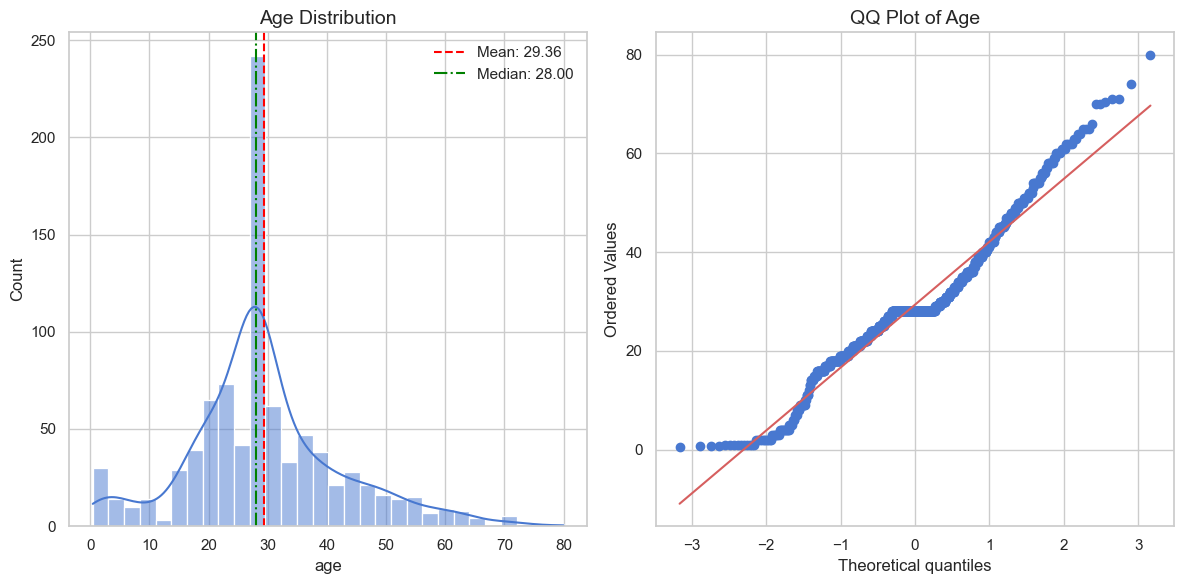

In [17]:
# Let's examine the distribution of passenger ages
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_clean['age'], kde=True, bins=30)
plt.title('Age Distribution', fontsize=14)
plt.axvline(df_clean['age'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["age"].mean():.2f}')
plt.axvline(df_clean['age'].median(), color='green', linestyle='-.', label=f'Median: {df_clean["age"].median():.2f}')
plt.legend()

# QQ Plot for normality check
plt.subplot(1, 2, 2)
stats.probplot(df_clean['age'].dropna(), plot=plt)
plt.title('QQ Plot of Age', fontsize=14)

plt.tight_layout()
plt.show()

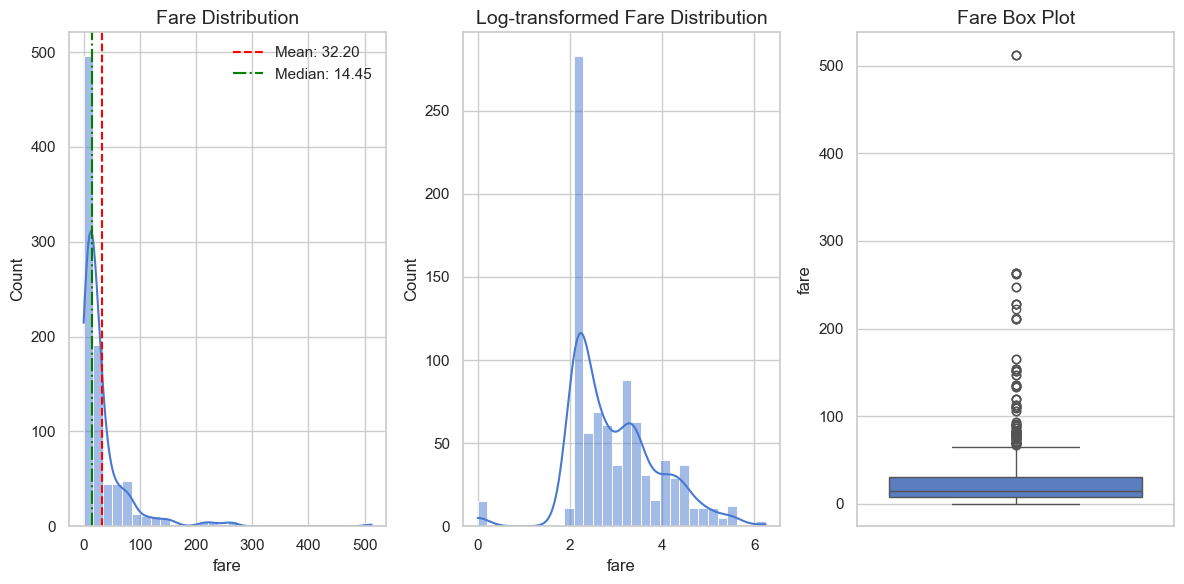

In [18]:
# Examine the distribution of fare
plt.figure(figsize=(12, 6))

# Histogram - original scale
plt.subplot(1, 3, 1)
sns.histplot(df_clean['fare'], kde=True, bins=30)
plt.title('Fare Distribution', fontsize=14)
plt.axvline(df_clean['fare'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["fare"].mean():.2f}')
plt.axvline(df_clean['fare'].median(), color='green', linestyle='-.', label=f'Median: {df_clean["fare"].median():.2f}')
plt.legend()

# Histogram - log scale
plt.subplot(1, 3, 2)
sns.histplot(np.log1p(df_clean['fare']), kde=True, bins=30)
plt.title('Log-transformed Fare Distribution', fontsize=14)

# Box plot
plt.subplot(1, 3, 3)
sns.boxplot(y=df_clean['fare'])
plt.title('Fare Box Plot', fontsize=14)

plt.tight_layout()
plt.show()

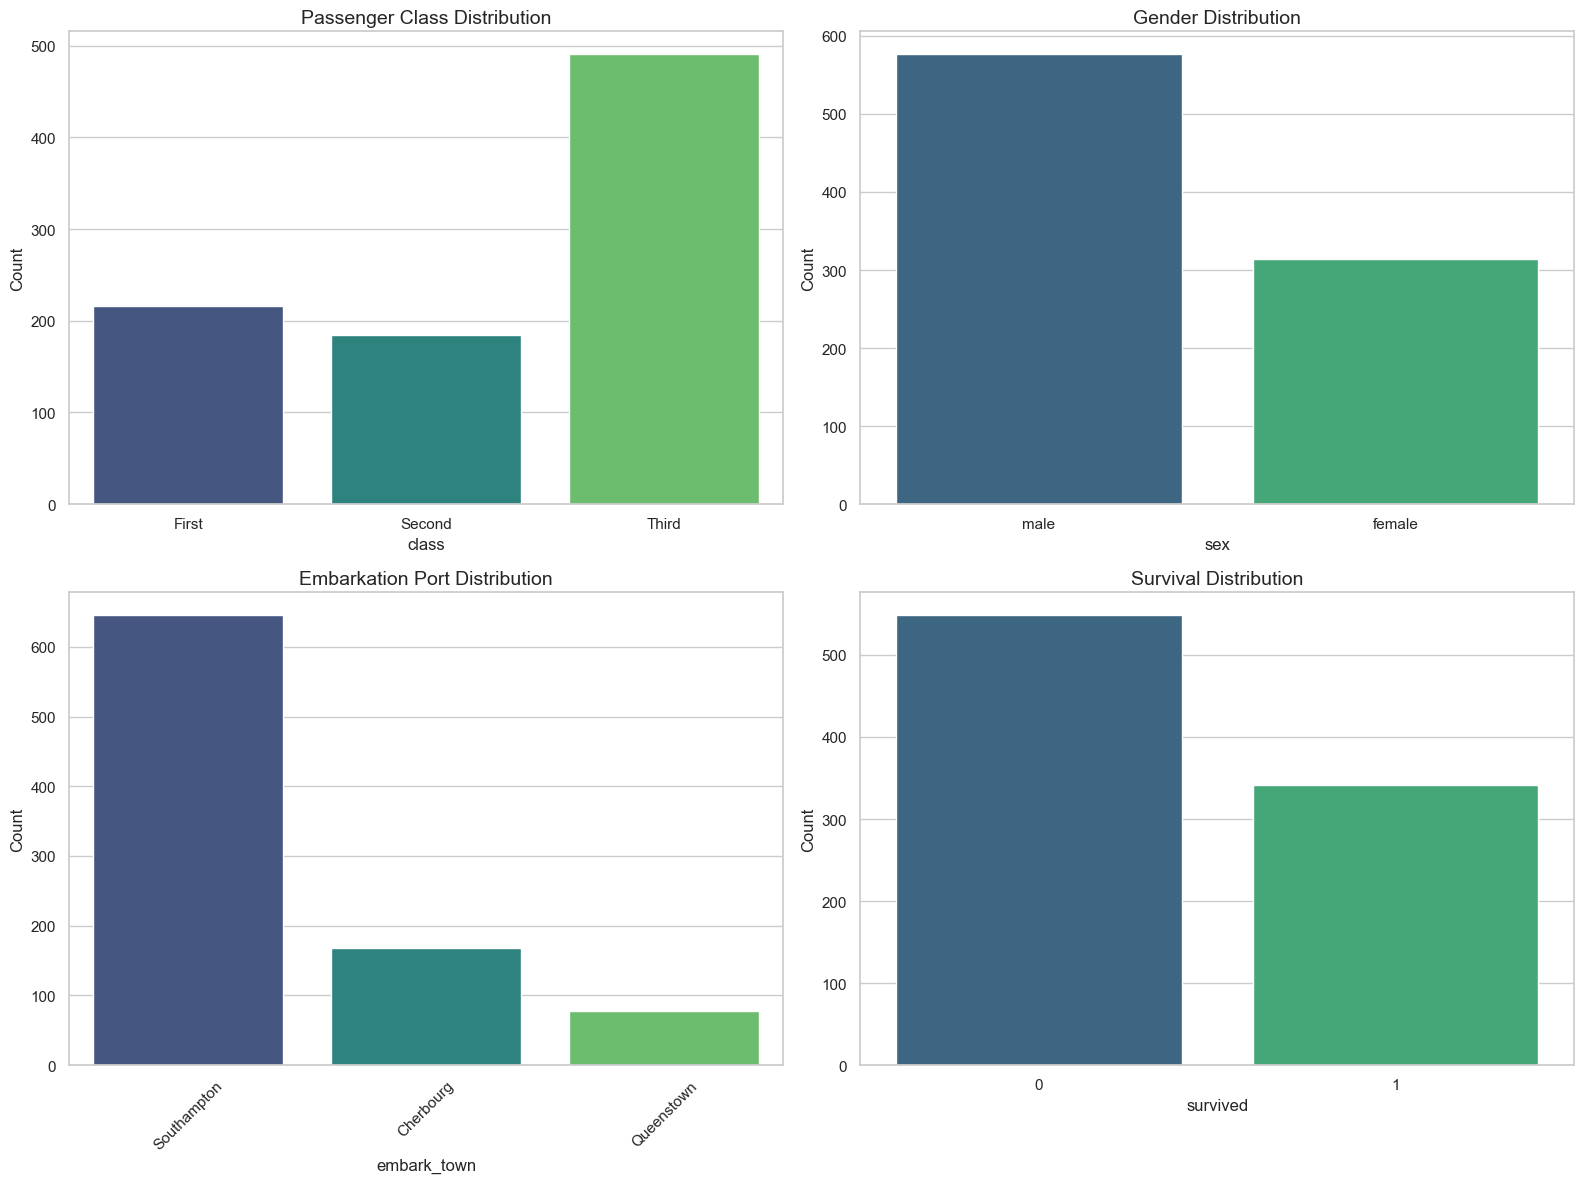

In [19]:
# Distribution of categorical variables
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='class', data=df_clean, palette='viridis')
plt.title('Passenger Class Distribution', fontsize=14)
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(x='sex', data=df_clean, palette='viridis')
plt.title('Gender Distribution', fontsize=14)
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(x='embark_town', data=df_clean, palette='viridis')
plt.title('Embarkation Port Distribution', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(x='survived', data=df_clean, palette='viridis')
plt.title('Survival Distribution', fontsize=14)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## 7. Correlation Analysis

Correlation analysis helps us understand relationships between numerical variables. Let's calculate and visualize correlations in our dataset.

In [20]:
# Select only numeric columns for correlation
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation matrix:")
correlation_matrix

Correlation matrix:


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


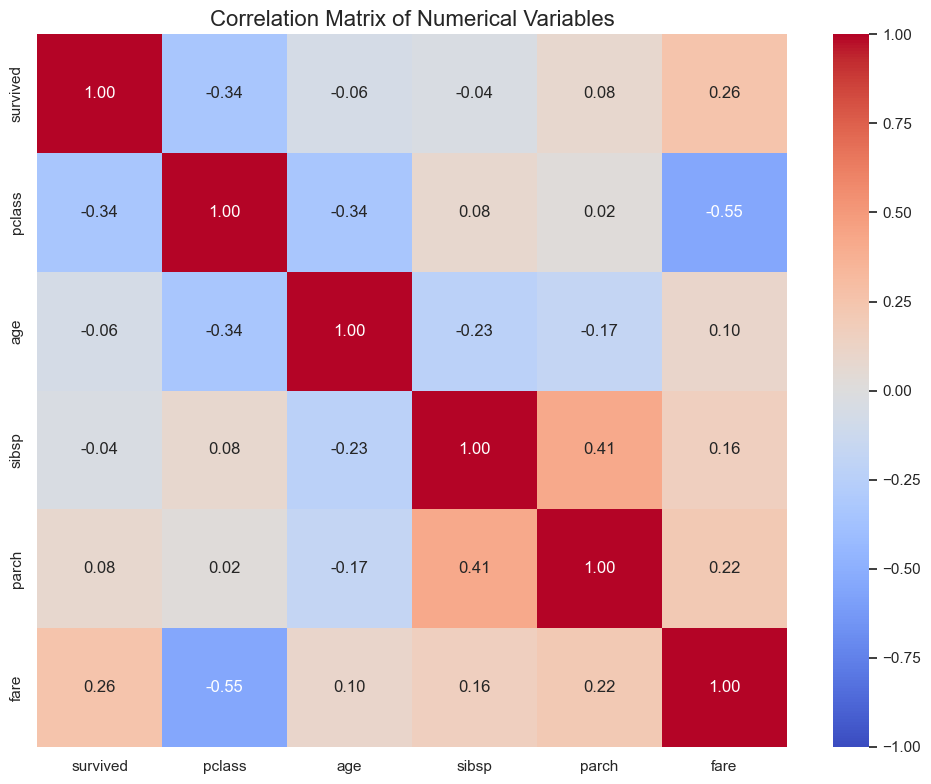

In [21]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

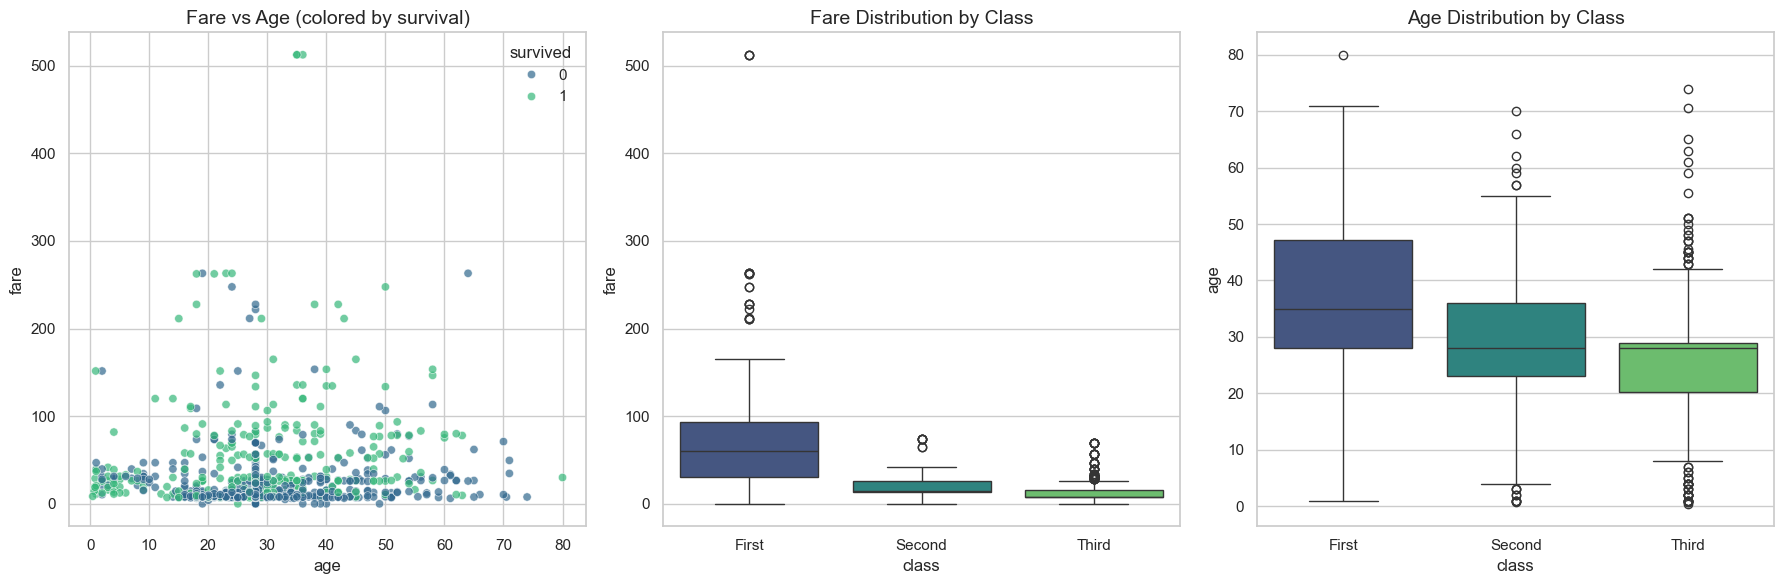

In [22]:
# Create scatter plots for important correlations
plt.figure(figsize=(18, 6))

# Fare vs Age
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='fare', hue='survived', data=df_clean, palette='viridis', alpha=0.7)
plt.title('Fare vs Age (colored by survival)', fontsize=14)

# Fare vs Pclass
plt.subplot(1, 3, 2)
sns.boxplot(x='class', y='fare', data=df_clean, palette='viridis')
plt.title('Fare Distribution by Class', fontsize=14)

# Age vs Pclass
plt.subplot(1, 3, 3)
sns.boxplot(x='class', y='age', data=df_clean, palette='viridis')
plt.title('Age Distribution by Class', fontsize=14)

plt.tight_layout()
plt.show()

## 8. Categorical Variable Analysis

Let's explore the categorical variables in more depth to understand their distributions and relationships with other variables.

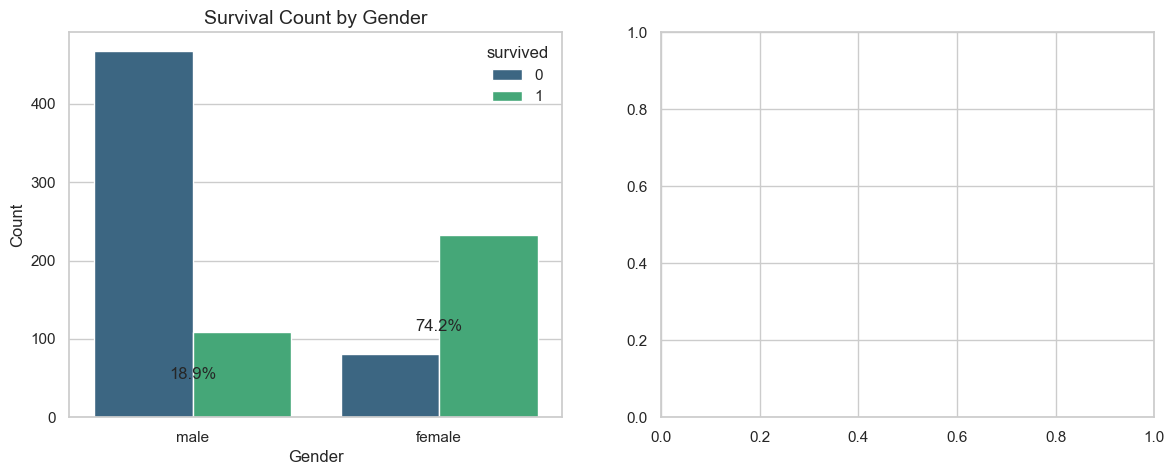

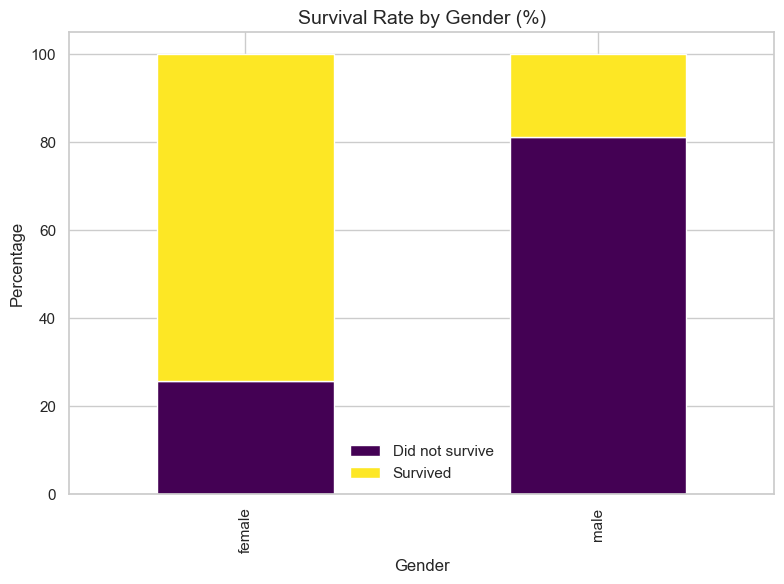

In [23]:
# Distribution of survival by sex
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='sex', hue='survived', data=df_clean, palette='viridis')
plt.title('Survival Count by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')

# Add percentages to the plot
for i, gender in enumerate(['male', 'female']):
    total = len(df_clean[df_clean['sex'] == gender])
    survived = len(df_clean[(df_clean['sex'] == gender) & (df_clean['survived'] == 1)])
    survival_rate = survived / total * 100
    plt.annotate(f'{survival_rate:.1f}%', 
                xy=(i, survived/2), 
                ha='center', 
                va='center',
                fontsize=12)

plt.subplot(1, 2, 2)
# Create a cross-tabulation to calculate survival rates by gender
survival_by_sex = pd.crosstab(df_clean['sex'], df_clean['survived'])
survival_by_sex_pct = survival_by_sex.div(survival_by_sex.sum(1), axis=0) * 100
survival_by_sex_pct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Survival Rate by Gender (%)', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

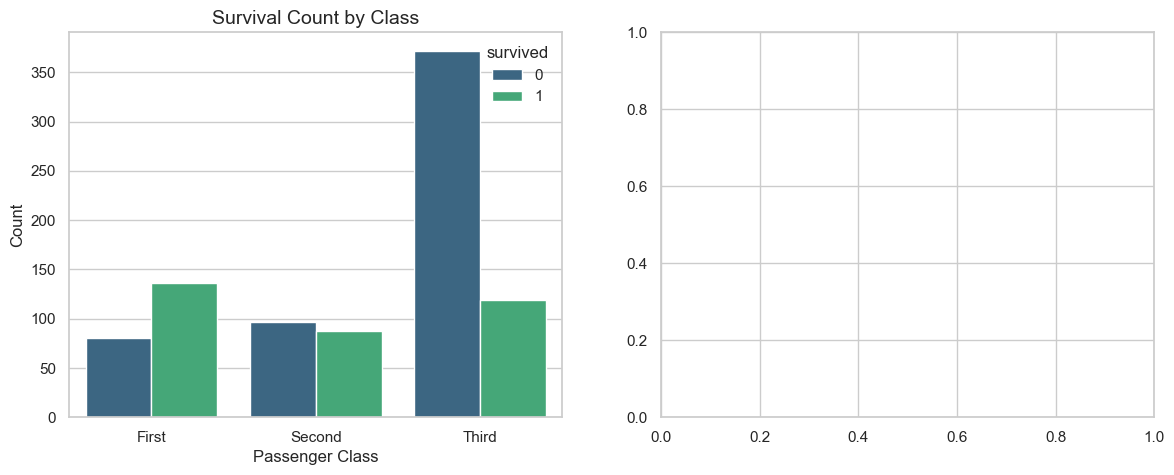

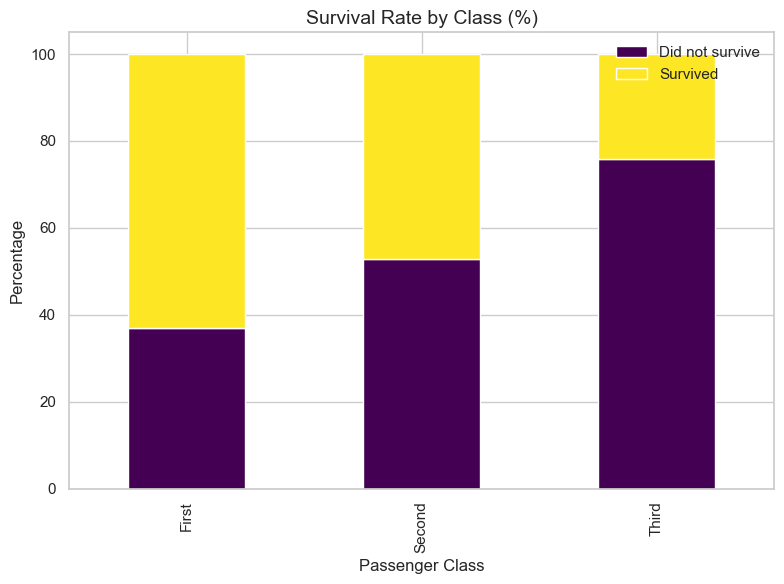

In [24]:
# Distribution of survival by class
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='class', hue='survived', data=df_clean, palette='viridis')
plt.title('Survival Count by Class', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
# Create a cross-tabulation to calculate survival rates by class
survival_by_class = pd.crosstab(df_clean['class'], df_clean['survived'])
survival_by_class_pct = survival_by_class.div(survival_by_class.sum(1), axis=0) * 100
survival_by_class_pct.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Survival Rate by Class (%)', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Percentage')
plt.legend(['Did not survive', 'Survived'])

plt.tight_layout()
plt.show()

Class vs Gender Contingency Table:
sex     female  male
class               
First       94   122
Second      76   108
Third      144   347


<Figure size 1000x600 with 0 Axes>

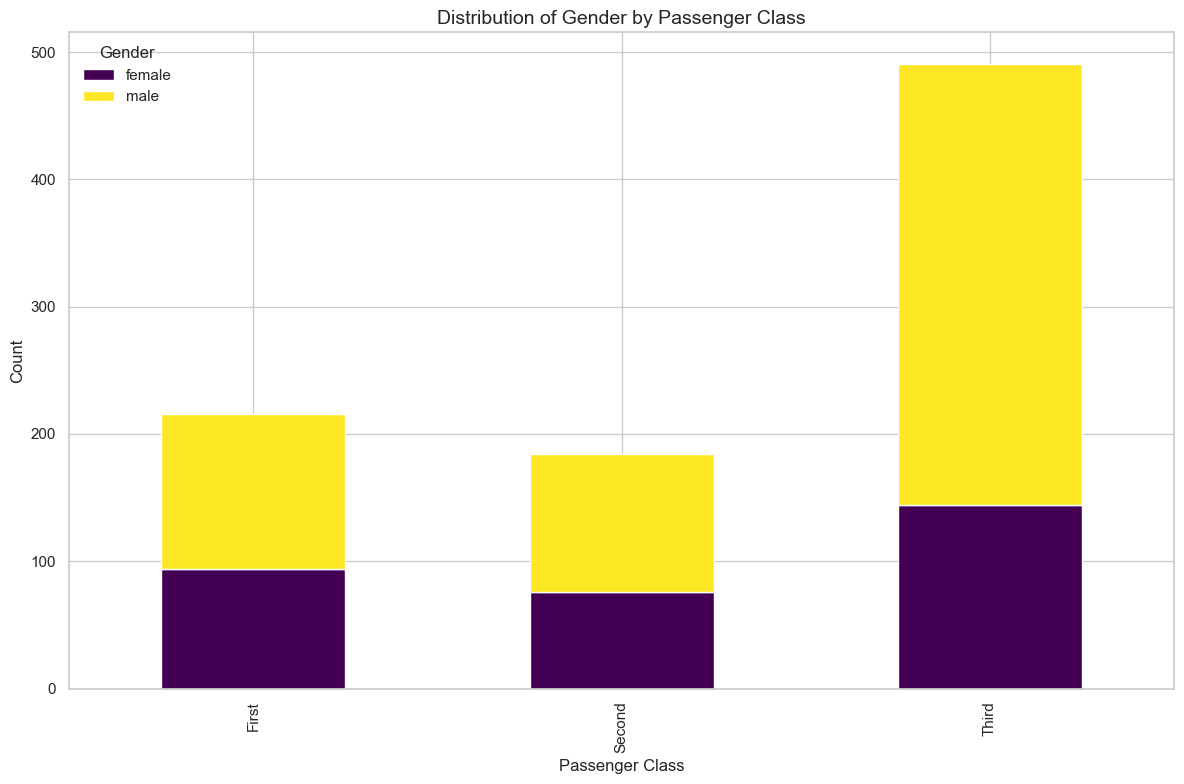

In [25]:
# Let's create a contingency table to analyze the relationship between passenger class and gender
contingency_table = pd.crosstab(df_clean['class'], df_clean['sex'])
print("Class vs Gender Contingency Table:")
print(contingency_table)

plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Gender by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## 9. Outlier Detection

Outliers can significantly impact statistical analyses and model performance. Let's identify and visualize outliers in our dataset.

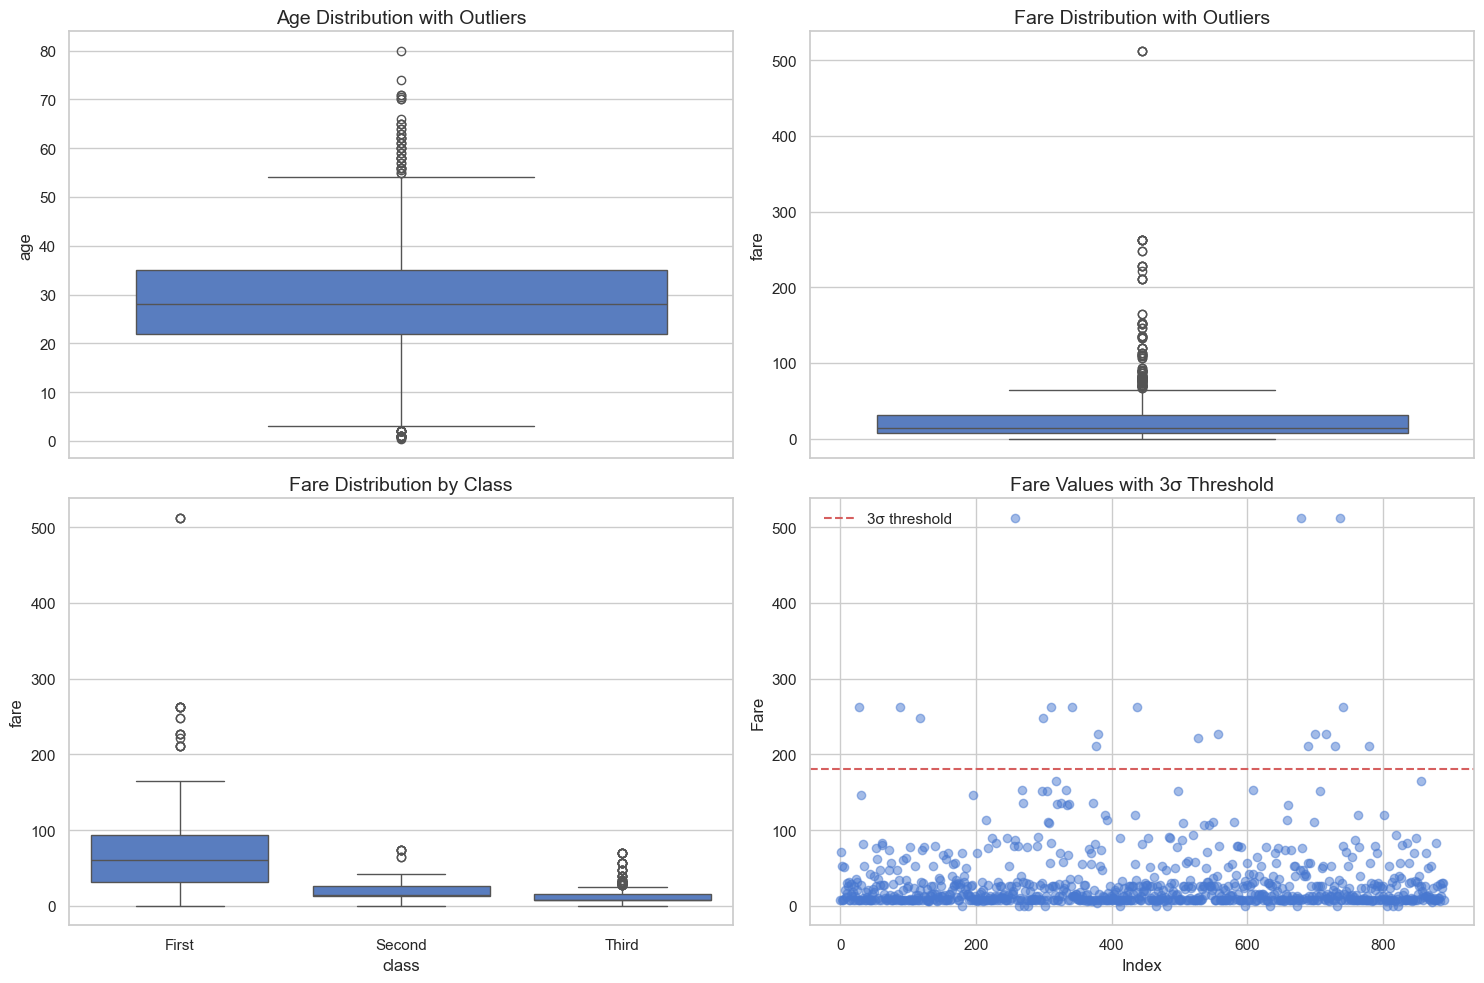

In [26]:
# Box plots are excellent for identifying outliers
plt.figure(figsize=(15, 10))

# Age Outliers
plt.subplot(2, 2, 1)
sns.boxplot(y='age', data=df_clean)
plt.title('Age Distribution with Outliers', fontsize=14)

# Fare Outliers
plt.subplot(2, 2, 2)
sns.boxplot(y='fare', data=df_clean)
plt.title('Fare Distribution with Outliers', fontsize=14)

# Fare by Class - to see if high fares are outliers or just first class
plt.subplot(2, 2, 3)
sns.boxplot(x='class', y='fare', data=df_clean)
plt.title('Fare Distribution by Class', fontsize=14)

# Numerical approach to identifying outliers in fare
plt.subplot(2, 2, 4)
plt.scatter(range(len(df_clean)), df_clean['fare'], alpha=0.5)
plt.axhline(y=df_clean['fare'].mean() + 3*df_clean['fare'].std(), color='r', linestyle='--', label='3σ threshold')
plt.title('Fare Values with 3σ Threshold', fontsize=14)
plt.ylabel('Fare')
plt.xlabel('Index')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Identifying outliers using Z-score and IQR methods

def identify_outliers_zscore(df, column, threshold=3):
    """Identify outliers using Z-score method"""
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outliers = df[column].dropna()[z_scores > threshold]
    return outliers

def identify_outliers_iqr(df, column):
    """Identify outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Identify fare outliers
fare_outliers_zscore = identify_outliers_zscore(df_clean, 'fare')
fare_outliers_iqr = identify_outliers_iqr(df_clean, 'fare')

print(f"Fare outliers using Z-score method: {len(fare_outliers_zscore)}")
print(f"Fare outliers using IQR method: {len(fare_outliers_iqr)}")

# Identify age outliers
age_outliers_zscore = identify_outliers_zscore(df_clean, 'age')
age_outliers_iqr = identify_outliers_iqr(df_clean, 'age')

print(f"\nAge outliers using Z-score method: {len(age_outliers_zscore)}")
print(f"Age outliers using IQR method: {len(age_outliers_iqr)}")

# Let's look at some of the fare outliers
print("\nTop 10 fare outliers (Z-score method):")
fare_outliers_df = df_clean.loc[fare_outliers_zscore.index]
fare_outliers_df.sort_values(by='fare', ascending=False)[['class', 'fare', 'sex', 'age']].head(10)

Fare outliers using Z-score method: 20
Fare outliers using IQR method: 116

Age outliers using Z-score method: 7
Age outliers using IQR method: 66

Top 10 fare outliers (Z-score method):


,class,fare,sex,age
258,First,512.3292,female,35.0
737,First,512.3292,male,35.0
679,First,512.3292,male,36.0
27,First,263.0000,male,19.0
341,First,263.0000,female,24.0
88,First,263.0000,female,23.0
438,First,263.0000,male,64.0
311,First,262.3750,female,18.0
742,First,262.3750,female,21.0
118,First,247.5208,male,24.0


## 10. Basic Data Visualization

Finally, let's create some insightful visualizations to gain deeper insights into the dataset relationships.

<Figure size 1200x1000 with 0 Axes>

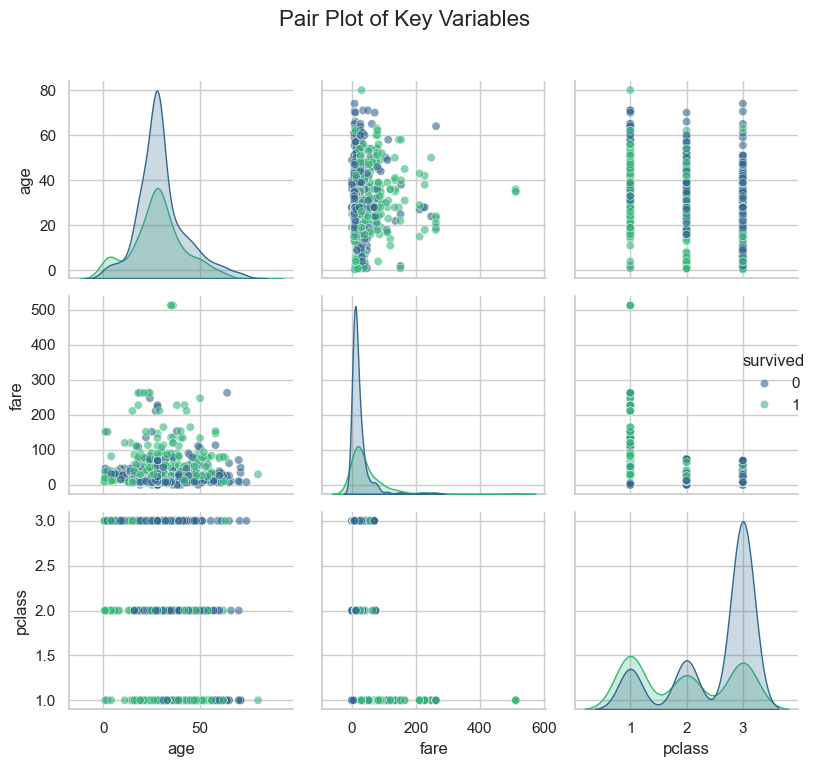

In [28]:
# Create a pair plot for numerical variables
plt.figure(figsize=(12, 10))
sns.pairplot(df_clean, 
             vars=['age', 'fare', 'pclass'],
             hue='survived',
             diag_kind='kde',
             plot_kws={'alpha': 0.6},
             palette='viridis')
plt.suptitle('Pair Plot of Key Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

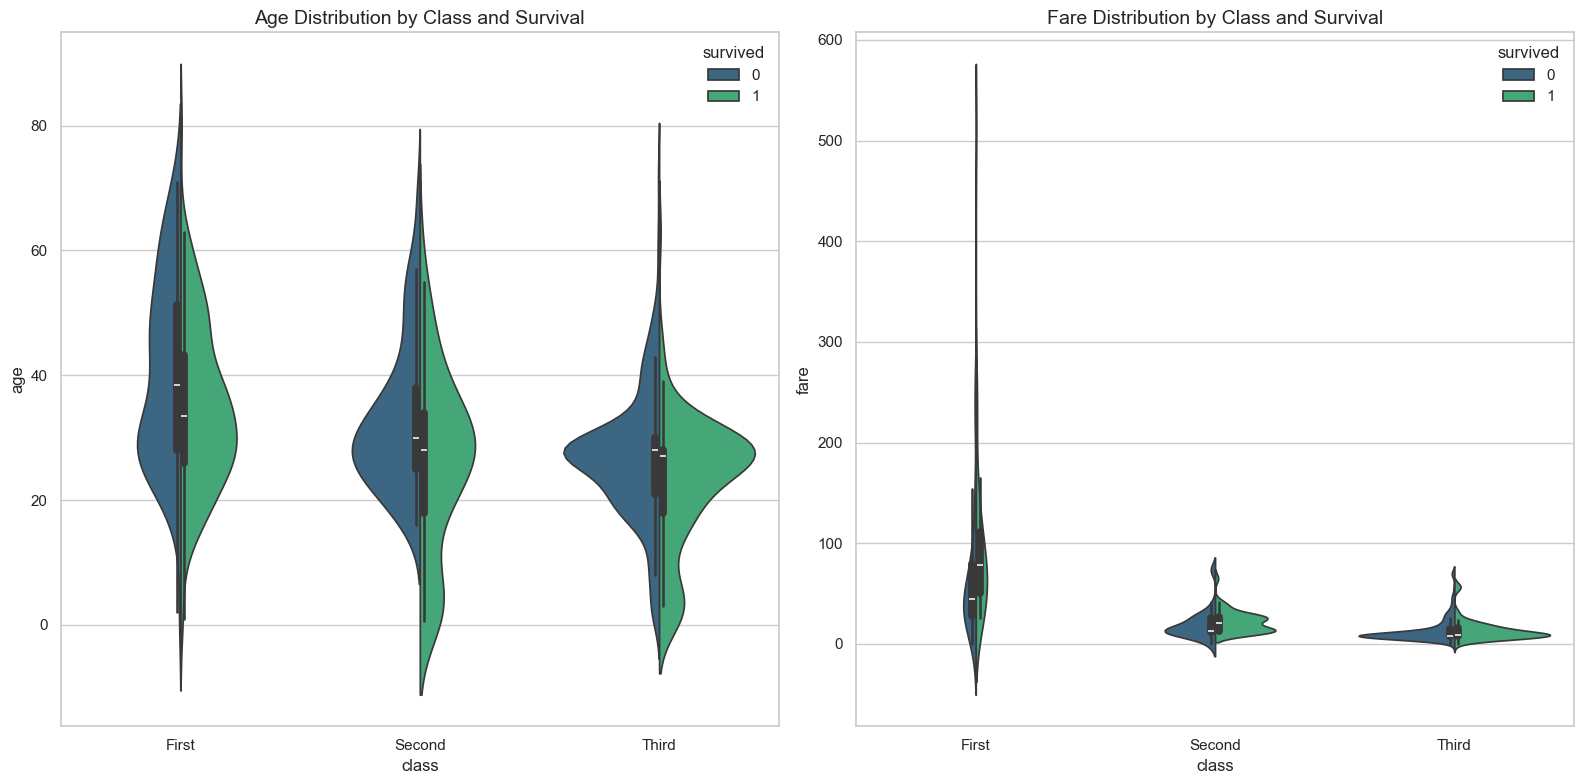

In [29]:
# Violin plots to compare distributions
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.violinplot(x='class', y='age', hue='survived', data=df_clean, palette='viridis', split=True)
plt.title('Age Distribution by Class and Survival', fontsize=14)

plt.subplot(1, 2, 2)
sns.violinplot(x='class', y='fare', hue='survived', data=df_clean, palette='viridis', split=True)
plt.title('Fare Distribution by Class and Survival', fontsize=14)

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

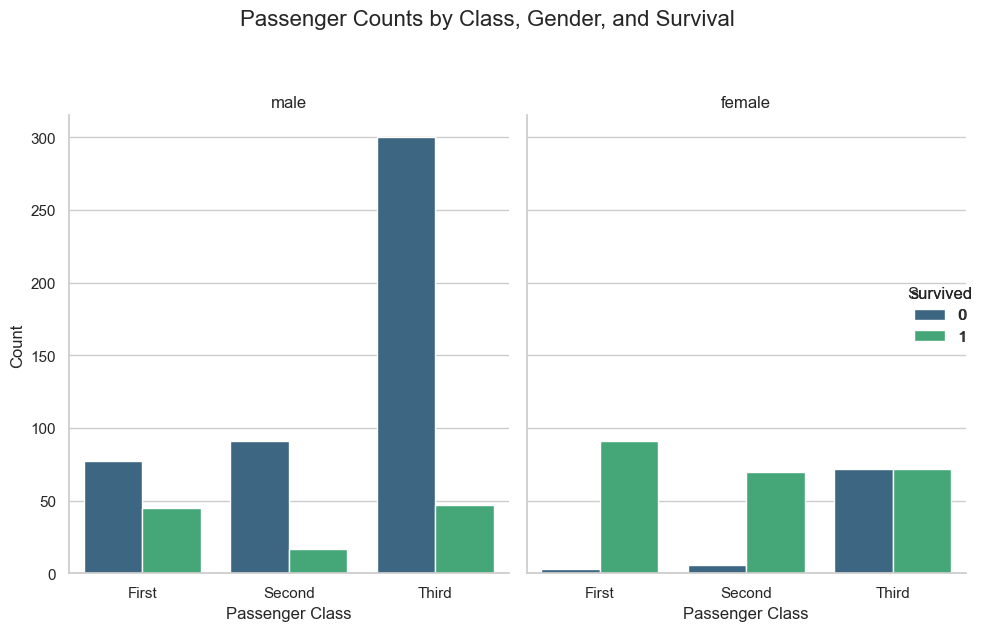

In [30]:
# Distribution of passengers by class, gender, and survival
plt.figure(figsize=(15, 10))

# Create a FacetGrid
g = sns.catplot(
    data=df_clean, kind="count",
    x="class", hue="survived", col="sex",
    palette="viridis", height=6, aspect=.7)

# Customize the plot
g.set_axis_labels("Passenger Class", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Passenger Counts by Class, Gender, and Survival', fontsize=16, y=1.05)
g.add_legend(title="Survived")

plt.tight_layout()
plt.show()

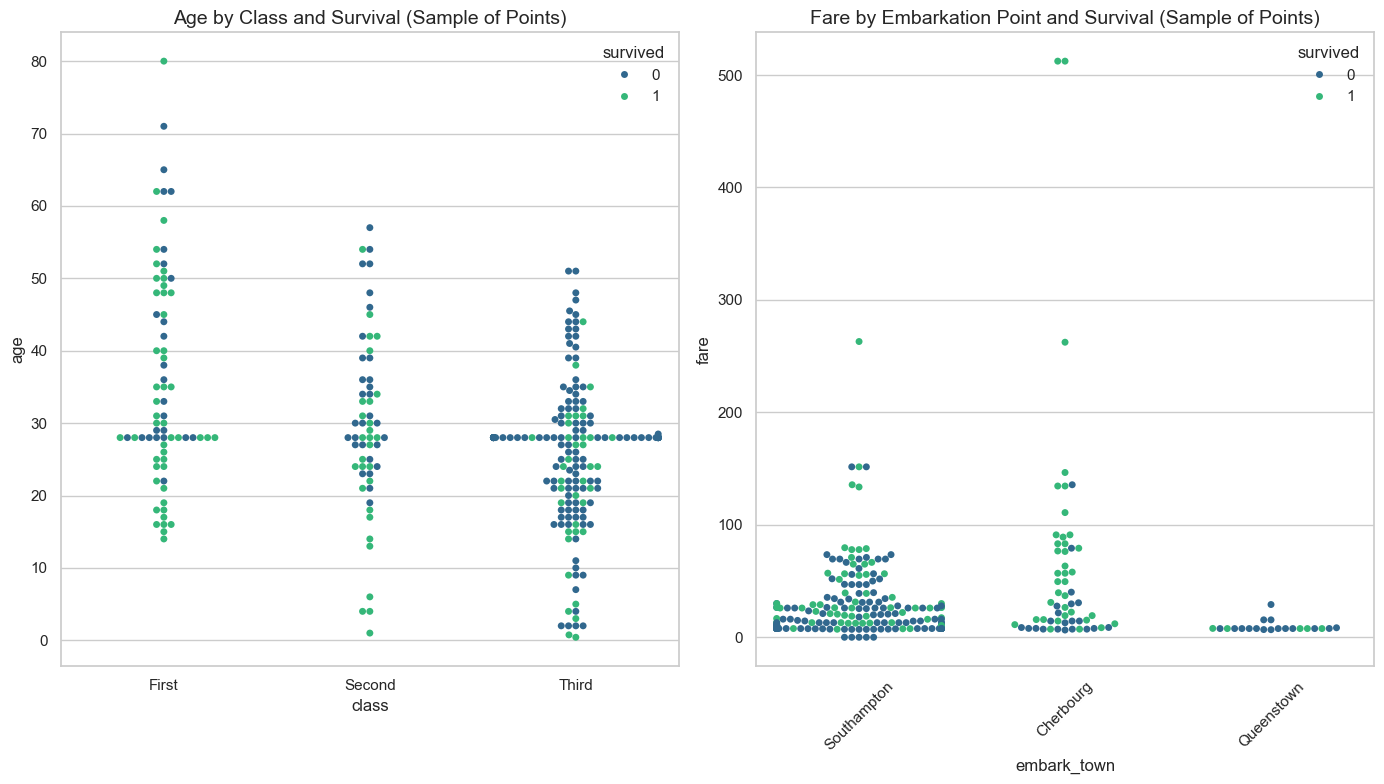

In [31]:
# Create a swarm plot to visualize individual data points
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
sns.swarmplot(x='class', y='age', hue='survived', data=df_clean.sample(n=min(300, len(df_clean))), palette='viridis')
plt.title('Age by Class and Survival (Sample of Points)', fontsize=14)

plt.subplot(1, 2, 2)
sns.swarmplot(x='embark_town', y='fare', hue='survived', data=df_clean.sample(n=min(300, len(df_clean))), palette='viridis')
plt.title('Fare by Embarkation Point and Survival (Sample of Points)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Summary and Conclusions

From our exploratory data analysis of the Titanic dataset, we've gained several key insights:

1. **Demographics**: The dataset contains information about 891 passengers with variables including age, sex, class, fare, and survival status.

2. **Missing Data**: There were significant missing values in 'age' (~20%) and 'deck' (~77%), which we addressed through imputation.

3. **Survival Patterns**:
   - Women had a much higher survival rate than men
   - Passengers in higher classes (1st class) had better survival rates than those in lower classes
   - Age also played a role in survival, with children having better odds

4. **Correlations**:
   - Fare was strongly correlated with passenger class (higher fares in higher classes)
   - Survival was correlated with sex, class, and fare
   - Age showed some correlation with class and survival

5. **Distributions**:
   - Age followed a somewhat normal distribution with a mean around 30 years
   - Fare was right-skewed, with most passengers paying lower fares and a few paying much higher amounts
   - There were more male passengers than female passengers

6. **Outliers**: We identified several outliers, particularly in the fare variable, mostly attributed to first-class passengers.

These insights provide a solid foundation for further analysis and modeling, highlighting important relationships and potential predictors of survival.

## Next Steps

Based on our EDA, potential next steps could include:

1. **Feature Engineering**: Create new features like family size (combining siblings/spouses and parents/children) or fare per person

2. **Data Preprocessing**: Normalize numerical features and encode categorical features for modeling

3. **Model Building**: Build predictive models to determine factors that influenced survival

4. **Advanced Analysis**: Conduct more sophisticated statistical tests to validate the observed patterns

5. **Visualization**: Create an interactive dashboard for stakeholders to explore the data and findings

EDA is just the beginning of the data science workflow, but it provides critical insights that guide all subsequent analytical decisions.